WBCD Dataset Neural Network 

### Import Libraries

In [69]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from textwrap import wrap

### Import more Libraries


In [70]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [71]:
RANDOM_SEED = 25

df = pd.read_csv('../datasets/us_income/adult-train.csv', delimiter=',', quotechar='"')


### Dataframe without Preprocessing 

In [72]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
   Age     Workclass  Fnlwgt      Education  EducationNum  \
0   34   Federal-gov   67083      Bachelors            13   
1   72   Federal-gov   39110           11th             7   
2   45   Federal-gov  235891     Assoc-acdm            12   
3   26   Federal-gov  206983    Prof-school            15   
4   31   Federal-gov  139455      Bachelors            13   
5   27   Federal-gov  196386     Assoc-acdm            12   
6   19   Federal-gov  255921   Some-college            10   
7   60   Federal-gov   27466   Some-college            10   
8   59   Federal-gov  212448        HS-grad             9   
9   32   Federal-gov  148138      Bachelors            13   

         MaritalStatus          Occupation    Relationship  \
0        Never-married     Exec-managerial       Unmarried   
1             Divorced        Adm-clerical   Not-in-family   
2        Never-married        Adm-clerical   Not-in-family   
3   Married-civ-spouse  

### Dataset Preprocessing 

In [73]:
df.replace(' <=50K', 0, inplace=True)
df.replace(' >50K', 1, inplace=True)

df = pd.get_dummies(df)
# print(df.head(5))

X = df.loc[:, df.columns != 'Income']
y = df['Income']



In [74]:
normalized_df=(df-df.mean())/df.std()
print(normalized_df.head(10))
# X = normalized_df.loc[:, normalized_df.columns != 'Income']
# print(X.head())


        Age    Fnlwgt  EducationNum  CapitalGain  CapitalLoss  HoursPerWeek  \
0 -0.337877 -1.161452      1.128900     0.051171    -0.218582     -0.077733   
1  2.555231 -1.426215     -1.224046    -0.147442    -0.218582     -2.748855   
2  0.499601  0.436307      0.736742    -0.147442    -0.218582     -0.077733   
3 -0.946952  0.162695      1.913215    -0.147442    -0.218582      1.591718   
4 -0.566280 -0.476455      1.128900    -0.147442    -0.218582     -0.077733   
5 -0.870818  0.062395      0.736742     0.401276    -0.218582     -0.077733   
6 -1.479893  0.625890     -0.047573    -0.147442    -0.218582     -1.747184   
7  1.641618 -1.536425     -0.047573    -0.147442    -0.218582     -0.077733   
8  1.565483  0.214421     -0.439731    -0.147442    -0.218582     -0.077733   
9 -0.490146 -0.394270      1.128900    -0.147442     4.733206     -0.077733   

     Income  Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Private  \
0 -0.575682                5.566339             -

### Sanity Check on Dataframe 

In [75]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
   Age  Fnlwgt  EducationNum  CapitalGain  CapitalLoss  HoursPerWeek  Income  \
0   34   67083            13         1471            0            40       0   
1   72   39110             7            0            0             8       0   
2   45  235891            12            0            0            40       0   
3   26  206983            15            0            0            60       0   
4   31  139455            13            0            0            40       0   
5   27  196386            12         4064            0            40       0   
6   19  255921            10            0            0            20       0   
7   60   27466            10            0            0            40       0   
8   59  212448             9            0            0            40       0   
9   32  148138            13            0         2002            40       0   

   Workclass_ Federal-gov  Workclass_ Local-gov 

### VT - (Followed by Clustering Later)

In [76]:
# Specify number of eignevectors to use for PCA 

thresh = 0

vt = VarianceThreshold(threshold=0)
X_dim_reduced = vt.fit(X).transform(X)
print(vt.variances_)
x = [i for i in vt.variances_ if i > 0.99999]
print(x)
print("Length of var list: ", len(x))


[1.72513699e+02 1.11621803e+10 6.50225850e+00 5.48521498e+07
 1.63451753e+05 1.43515264e+02 3.02870357e-02 6.38335859e-02
 1.92937907e-01 3.43398087e-02 7.59880433e-02 4.06062210e-02
 4.63944757e-04 2.64474189e-02 3.35384424e-02 1.23429419e-02
 4.98123628e-03 9.45726576e-03 1.81259171e-02 1.48576431e-02
 3.23026692e-02 4.14549499e-02 1.39264320e-01 1.22782865e-02
 2.19806876e-01 5.10323019e-02 1.48971761e-03 1.76467230e-02
 1.72384501e-01 1.20192716e-01 6.95755552e-04 2.48865336e-01
 1.21166095e-02 2.18479095e-01 3.01626934e-02 2.66668262e-02
 1.08147697e-01 2.98299665e-04 1.15759708e-01 1.14834923e-01
 3.17144448e-02 4.27549993e-02 6.09327451e-02 9.51511485e-02
 4.71858722e-03 1.15953996e-01 2.08954883e-02 1.04705628e-01
 2.93224624e-02 4.94022155e-02 2.42466115e-01 1.90537237e-01
 2.86054459e-02 1.26143237e-01 9.51511485e-02 4.44419928e-02
 9.39221905e-03 2.87926058e-02 8.46729135e-02 7.59998851e-03
 1.20550821e-01 2.19134909e-01 2.19134909e-01 5.96421259e-04
 3.53492528e-03 2.249409

### Change the Threshold Parameter

In [66]:
# Specify number of eignevectors to use for PCA 

thresh = 0
# thresh_list = np.linspace(0.01, 0.4, 0.05)
thresh_list = [0]
for i in range(9): 
    thresh_list.append(thresh_list[i] + .1)
    
error_list = []

for thresh in thresh_list: 
    print("Threshold variance: ", thresh)
    
    vt = VarianceThreshold(threshold=thresh)
    X_dim_reduced = vt.fit(X).transform(X)
    print("X_dim_reduced.shape: ", X_dim_reduced.shape)
    
    clf_dimReduced = KMeans(n_clusters=2, random_state=0)
    clf_dimReduced.fit(X_dim_reduced)
    error_dimReduced = mean_squared_error(y, clf_dimReduced.predict(X_dim_reduced))
    error_dimReduced = min(error_dimReduced, 1 - error_dimReduced)
    error_list.append(error_dimReduced)

    print("Printing error_dimReduced ... ", error_dimReduced)


Threshold variance:  0
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.1
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.2
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.30000000000000004
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.4
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.5
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.6
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.7
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  0.2866852330747298
Threshold variance:  0.7999999999999999
X_dim_reduced.shape:  (30162, 104)
Printing error_dimReduced ...  

### Plot the MSE with changing threshold

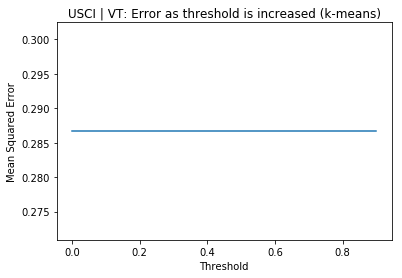

In [68]:
plt.plot(thresh_list, error_list, '-')
plt.title('USCI | VT: Error as threshold is increased (k-means)')
plt.xlabel('Threshold')
plt.ylabel('Mean Squared Error')
plt.savefig('USCI_VT_K-means.png')
plt.show()